In [2]:
# Checking for the Expenditure vs the Sales Created:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the Data from Desktop
df = pd.read_csv("./ML_Internship/Sales_Forecasting/Advertising.csv")

In [4]:
# Checking the first 5 DataSets:
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
# Checking the last 5 DataSets:
df.tail(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
# Dropping the Unnecessary Column:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [7]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [8]:
# Checking for the Null Values:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

C:\Users\Guest1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


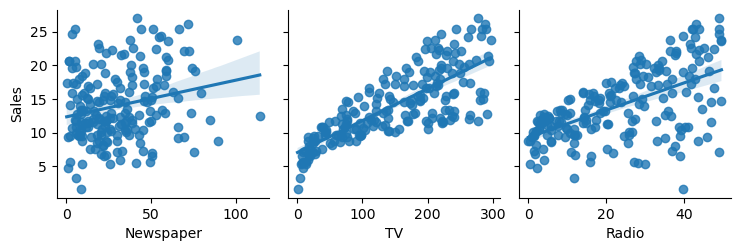

In [10]:


sns.pairplot(df, x_vars=["Newspaper", "TV", "Radio"], y_vars="Sales", kind='reg')

In [11]:
# Result of the Linear Regression Line:
# Notice that the Data Points are More Linear Correlated and Clustered Closer to the regression line for TV as
# compared to the Newspaper and the Radio.
# It mean to say that increasing the Expenditure on the TV will have much more
# Linear Relationship to increasing the Sales as compared to Increasing the Expenditure for the 
# Newspaper and the Radio where the points are much more Scattered Apart from the line.

Text(0.5, 1.0, 'Correlation Coefficient for the Various Factors')

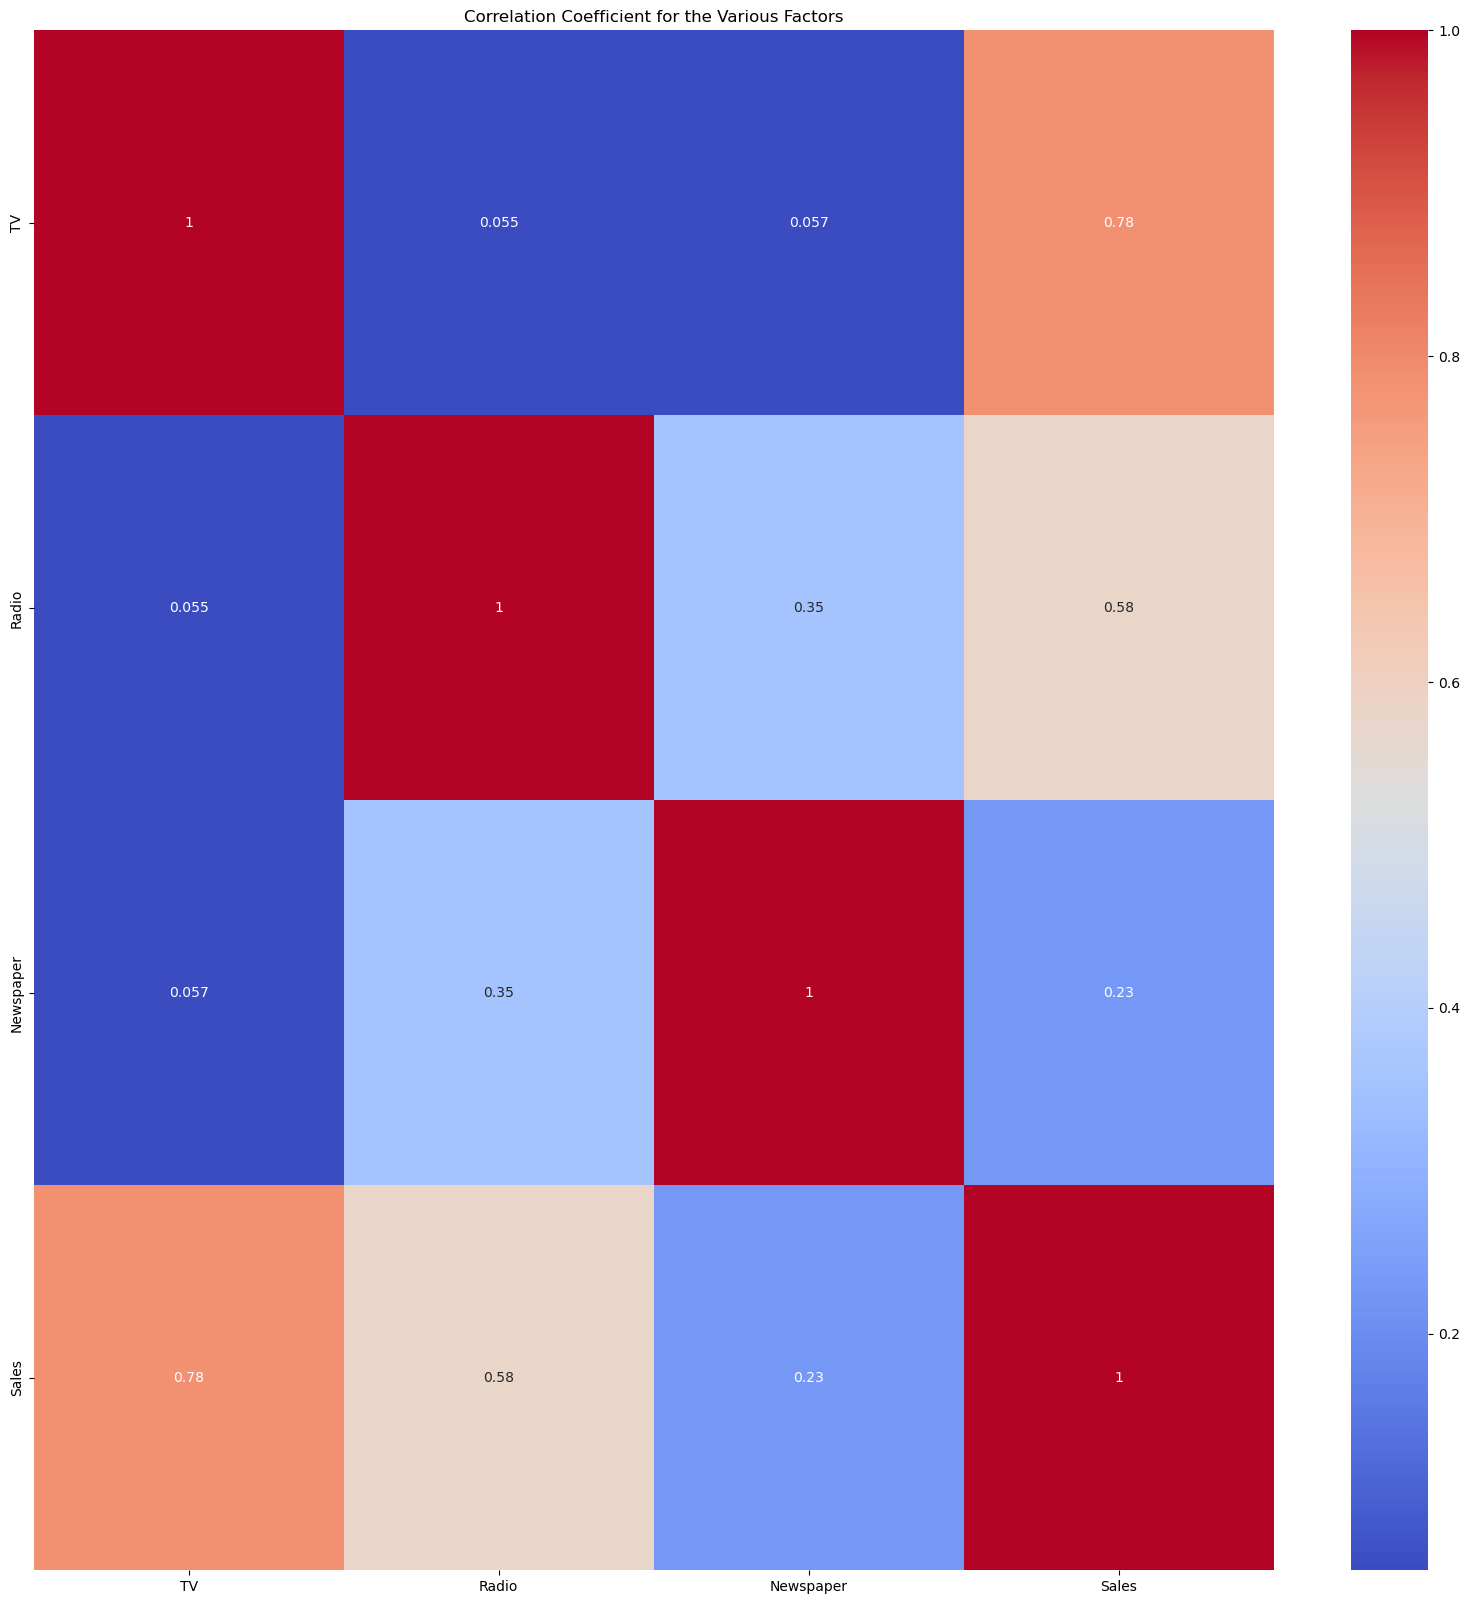

In [12]:
# Creating the Heatmap:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Coefficient for the Various Factors")


In [13]:
# Interpreting the Heatmap:
# In this case, the TV Advertising Expenditure and the Radio Advertising Expenditure
# have a Much Higher Correlation to the Sales as compared to Newspaper
# Higher Correlation mean that the Sales is much more closely related to the Sales Revenue
# for the TV Advertising and the Radio Advertising Expenditure.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Getting the X_Variables
# Dropping the Sales Column which Belong to the Y_Variable
x = df.drop("Sales", axis=1)

In [28]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [29]:
# Getting the Y_Variables:
y = df["Sales"]

In [30]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [31]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.4, random_state=53)

In [32]:
# Creating the Linear Regression Model
model =LinearRegression()

In [33]:
# Training the Model with the train data:
model.fit(X_train, Y_train)

LinearRegression()

In [34]:
prediction = model.predict(X_test)

In [35]:
# Calculating the mean_squared_error:
mean_squared_error = mean_squared_error(Y_test, prediction)

In [36]:
mean_squared_error

2.165573572785246

In [39]:
# Calculating the R-Squared:
r2_score = r2_score(Y_test, prediction)

In [40]:
r2_score

0.9112340472662026

In [ ]:
# Using the LinearRegressionModel:
# The MAE Score is actually 2.16557 on average for the Different DataSets
# and the R2_score is actually 0.91123 which is very close to 1.